/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/status/active/. Retrying...
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The optimal value of K is: 3
The accuracy score of the optimal KNN model is: 0.9712857142857143


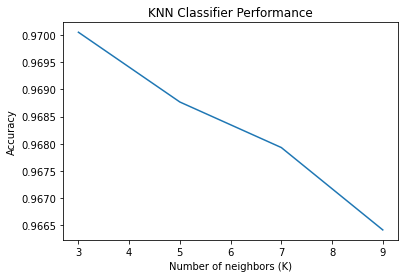

Accuracy: 0.9712857142857143
Precision: 0.9717774214531696
Recall: 0.9708657044620269
F1 score: 0.9711991586660975
Confusion matrix:
 [[1335    0    5    0    0    0    1    1    1    0]
 [   0 1591    3    0    1    1    0    3    0    1]
 [   8   14 1333    1    1    1    4   13    3    2]
 [   0    3   12 1382    0   10    2   10    7    7]
 [   3    9    1    0 1248    0    2    4    1   27]
 [   4    5    0   13    4 1234   12    0    1    0]
 [   5    1    0    0    4    3 1383    0    0    0]
 [   1   17    4    0    2    0    0 1467    1   11]
 [   6   13    8   21    4   16    3    6 1269   11]
 [   6    6    3   14   20    0    0   14    1 1356]]


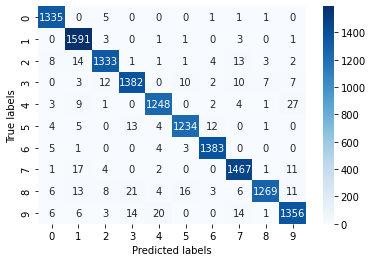

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Perform grid search with cross-validation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Find the optimal value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"The optimal value of K is: {best_k}")

# Find the accuracy score of the optimal KNN model
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score of the optimal KNN model is: {accuracy}")

# Plot the accuracy scores for different values of K
k_values = [3, 5, 7, 9]
accuracy_scores = grid_search.cv_results_['mean_test_score']
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

import seaborn as sns
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
